# OLD PHOTOS CLASSIFIER

## Importing Libraries

In [1]:
import pandas as pd
import cv2
import os
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Creating the train and test dataset

### Function for image data preproccessing

In [2]:
def importing_image_data(path, label):
    x = []
    y = []
    for img_name in os.listdir(path):
        if 'spate' in img_name:
            continue
        img = cv2.imread(path + '\\' + img_name)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = img / 255
        x.append(img)
        y.append(label)
    
    return np.array(x), np.array(y)

### Preproccessing the black and white and color images seperately

In [3]:
x_black_and_white, y_black_and_white = importing_image_data("D:\\Imagini\\Alb_Negru", 0)
x_color, y_color = importing_image_data("D:\\Imagini\\Color", 1)

x_black_and_white.shape, y_black_and_white.shape, x_color.shape, y_color.shape

((261, 224, 224, 3), (261,), (70, 224, 224, 3), (70,))

### Equaling the number of black and white images to the number of color images

In [5]:
x_black_and_white, y_black_and_white = x_black_and_white[:70], y_black_and_white[:70]

x_black_and_white.shape, y_black_and_white.shape, x_color.shape, y_color.shape

((70, 224, 224, 3), (70,), (70, 224, 224, 3), (70,))

### Creating a test and train set for black and white and color images seperately

In [6]:
x_black_and_white_train, x_black_and_white_test, y_black_and_white_train, y_black_and_white_test = train_test_split(x_black_and_white, y_black_and_white, test_size = 0.1, random_state = 42)
x_color_train, x_color_test, y_color_train, y_color_test = train_test_split(x_color, y_color, test_size=0.1, random_state=42)

print(x_black_and_white_train.shape, x_black_and_white_test.shape, y_black_and_white_train.shape, y_black_and_white_test.shape)
print(x_color_train.shape, x_color_test.shape, y_color_train.shape, y_color_test.shape)

(63, 224, 224, 3) (7, 224, 224, 3) (63,) (7,)
(63, 224, 224, 3) (7, 224, 224, 3) (63,) (7,)


### Combining the test and train sets

In [7]:
x_train = np.vstack((x_black_and_white_train, x_color_train))
x_test = np.vstack((x_black_and_white_test, x_color_test))
y_train = np.hstack((y_black_and_white_train, y_color_train))
y_test = np.hstack((y_black_and_white_test, y_color_test))

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((126, 224, 224, 3), (14, 224, 224, 3), (126,), (14,))

## Model Configuration

### Building the model

In [10]:
model = Sequential()


model.add(Conv2D(64, (3, 3), activation='relu', input_shape = (224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics='accuracy')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 flatten_2 (Flatten)         (None, 760384)            0         
                                                                 
 dense_10 (Dense)            (None, 256)               194658560 
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                      

### Training the model

In [11]:
model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), batch_size=10)

Epoch 1/10


13/13 [==============================] - 207s 14s/step - loss: 2.3025 - accuracy: 0.4683 - val_loss: 0.6480 - val_accuracy: 0.7143
Epoch 2/10
13/13 [==============================] - 147s 11s/step - loss: 0.5971 - accuracy: 0.7302 - val_loss: 0.8222 - val_accuracy: 0.5000
Epoch 3/10
13/13 [==============================] - 118s 8s/step - loss: 0.3788 - accuracy: 0.8730 - val_loss: 0.3672 - val_accuracy: 0.7857
Epoch 4/10
13/13 [==============================] - 79s 6s/step - loss: 0.1144 - accuracy: 0.9683 - val_loss: 0.4044 - val_accuracy: 0.7857
Epoch 5/10
13/13 [==============================] - 87s 7s/step - loss: 0.5971 - accuracy: 0.8889 - val_loss: 0.4905 - val_accuracy: 0.6429
Epoch 6/10
13/13 [==============================] - 89s 7s/step - loss: 0.3180 - accuracy: 0.8651 - val_loss: 0.5400 - val_accuracy: 0.7857
Epoch 7/10
13/13 [==============================] - 101s 8s/step - loss: 0.3690 - accuracy: 0.8730 - val_loss: 0.4815 - val_accuracy: 0.7143
Epoch 8/10
1

### Evaluating the model

1/1 [==============================] - 18s 18s/step


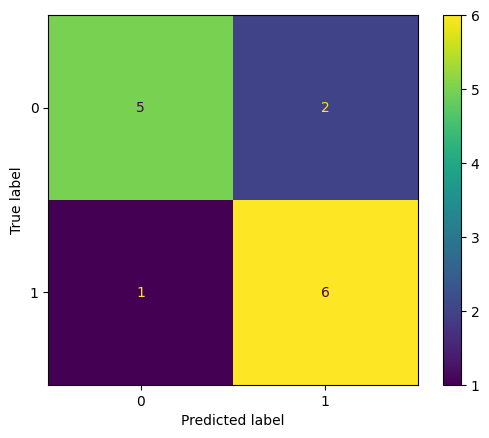

In [12]:
predicted = model.predict(x_test)
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

#### ! NOT FINAL MODEL !